# Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score

from collections import Counter
import csv
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Data Exploratory

## Data Collection

In [8]:
df = pd.read_csv('mbti.csv')

## Data Understanding

In [9]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 21208 rows and 2 columns.


In [10]:
df.head()

,posts,type
0,time resus entp intj intp last one best answer...,INTP
1,dispose fe value ti make aim run unbiased chan...,INTP
2,people much time arrow represent laptop awesom...,INTP
3,achieve success future career choose like way ...,INTP
4,term meditation find region brain active wande...,INTP


In [11]:
df.tail()

,posts,type
21203,mood set though label make sound concrete colo...,ESFJ
21204,think bruno could though type estp mbti fan ei...,ESFJ
21205,think people care bullshit sure everyone flaw ...,ESFJ
21206,one function understand enough know really inf...,ESFJ
21207,feel like get sometimes confident mean real me...,ESFJ


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21208 entries, 0 to 21207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   posts   21208 non-null  object
 1   type    21208 non-null  object
dtypes: object(2)
memory usage: 331.5+ KB


In [13]:
df.dtypes

posts    object
type     object
dtype: object

In [14]:
df.describe()

,posts,type
count,21208,21208
unique,21208,16
top,time resus entp intj intp last one best answer...,INTP
freq,1,4992


In [9]:
df.nunique()

posts    21208
type        16
dtype: int64

In [10]:
types = df['type'].unique()
types

array(['INTP', 'INTJ', 'INFJ', 'INFP', 'ENTP', 'ENFP', 'ISTP', 'ENTJ',
       'ESTP', 'ENFJ', 'ISTJ', 'ISFP', 'ISFJ', 'ESTJ', 'ESFP', 'ESFJ'],
      dtype=object)

In [11]:
posts = df['type'].value_counts()
posts

INTP    4992
INTJ    4485
INFJ    2992
INFP    2426
ENTP    2345
ENFP    1233
ISTP     684
ENTJ     591
ESTP     397
ENFJ     306
ISTJ     248
ISFP     175
ISFJ     130
ESTJ      96
ESFP      72
ESFJ      36
Name: type, dtype: int64

## Data Cleaning

In [12]:
df.isnull().sum()

posts    0
type     0
dtype: int64

In [13]:
df.duplicated().sum()

0

### Removing Duplicate Characters

In [14]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    return text

In [15]:
df['posts'] = df['posts'].apply(clean_text)

### Stopword Removal

In [16]:
stop_words_set = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    stopwords = [word for word in words if word not in stop_words_set]
    return ' '.join(stopwords)

In [17]:
df['posts'] = df['posts'].apply(remove_stopwords)

### Word Stemming with Porter Stemmer

In [18]:
from nltk.stem.porter import PorterStemmer

In [19]:
stemmer = PorterStemmer()

def stem_words(text):
    stemmed_words = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_words)

In [20]:
df['posts'] = df['posts'].apply(stem_words)

### Word Lemmatization with WordNet Lemmatizer

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [23]:
df["posts"] = df["posts"].apply(lambda text: lemmatize_words(text))

In [24]:
df.to_csv('preprocessed.csv', index=False)

In [25]:
df = pd.read_csv('preprocessed.csv')

In [98]:
df

,posts,type
0,time resu entp intj intp last one best answer ...,INTP
1,dispos fe valu ti make aim run unbias channel ...,INTP
2,peopl much time arrow repres laptop awesom sch...,INTP
3,achiev success futur career choos like way thi...,INTP
4,term medit find region brain activ wander acti...,INTP
...,...,...
21203,mood set though label make sound concret color...,ESFJ
21204,think bruno could though type estp mbti fan ei...,ESFJ
21205,think peopl care bullshit sure everyon flaw po...,ESFJ
21206,one function understand enough know realli inf...,ESFJ


## Data Visualization

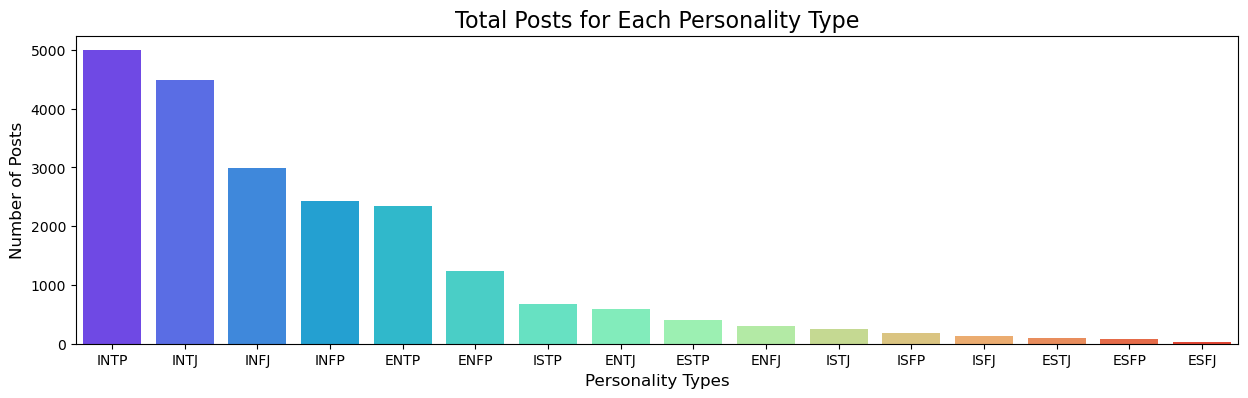

In [26]:
plt.figure(figsize=(15, 4))
sns.barplot(x=posts.index, y=posts.values, palette='rainbow')
plt.xlabel('Personality Types', fontsize = 12)
plt.ylabel('Number of Posts', fontsize = 12)
plt.title('Total Posts for Each Personality Type', fontsize = 16)
plt.show()

### Word Cloud Visualization

In [27]:
words = df["posts"].str.split().explode()
word_counts = Counter(words)
top_100_words = word_counts.most_common(100)
top_100_words

[('like', 147842),
 ('think', 119434),
 ('peopl', 110655),
 ('get', 107005),
 ('thing', 81461),
 ('make', 81387),
 ('know', 75708),
 ('feel', 75364),
 ('one', 73941),
 ('go', 72886),
 ('time', 70329),
 ('say', 70085),
 ('good', 68433),
 ('would', 66716),
 ('realli', 65027),
 ('want', 57547),
 ('person', 53801),
 ('way', 53624),
 ('see', 47827),
 ('also', 46226),
 ('work', 46217),
 ('much', 46143),
 ('someth', 45209),
 ('tri', 43729),
 ('take', 42585),
 ('find', 42010),
 ('type', 41996),
 ('even', 41303),
 ('use', 39639),
 ('well', 38924),
 ('friend', 38123),
 ('lot', 37593),
 ('need', 37472),
 ('love', 34648),
 ('someon', 33725),
 ('life', 33482),
 ('mean', 33211),
 ('come', 32020),
 ('talk', 30935),
 ('could', 30797),
 ('look', 30760),
 ('though', 29758),
 ('actual', 29753),
 ('differ', 28976),
 ('give', 28667),
 ('alway', 28243),
 ('help', 27850),
 ('intp', 27342),
 ('intj', 27340),
 ('never', 27135),
 ('interest', 26937),
 ('understand', 26919),
 ('right', 26796),
 ('seem', 26763),


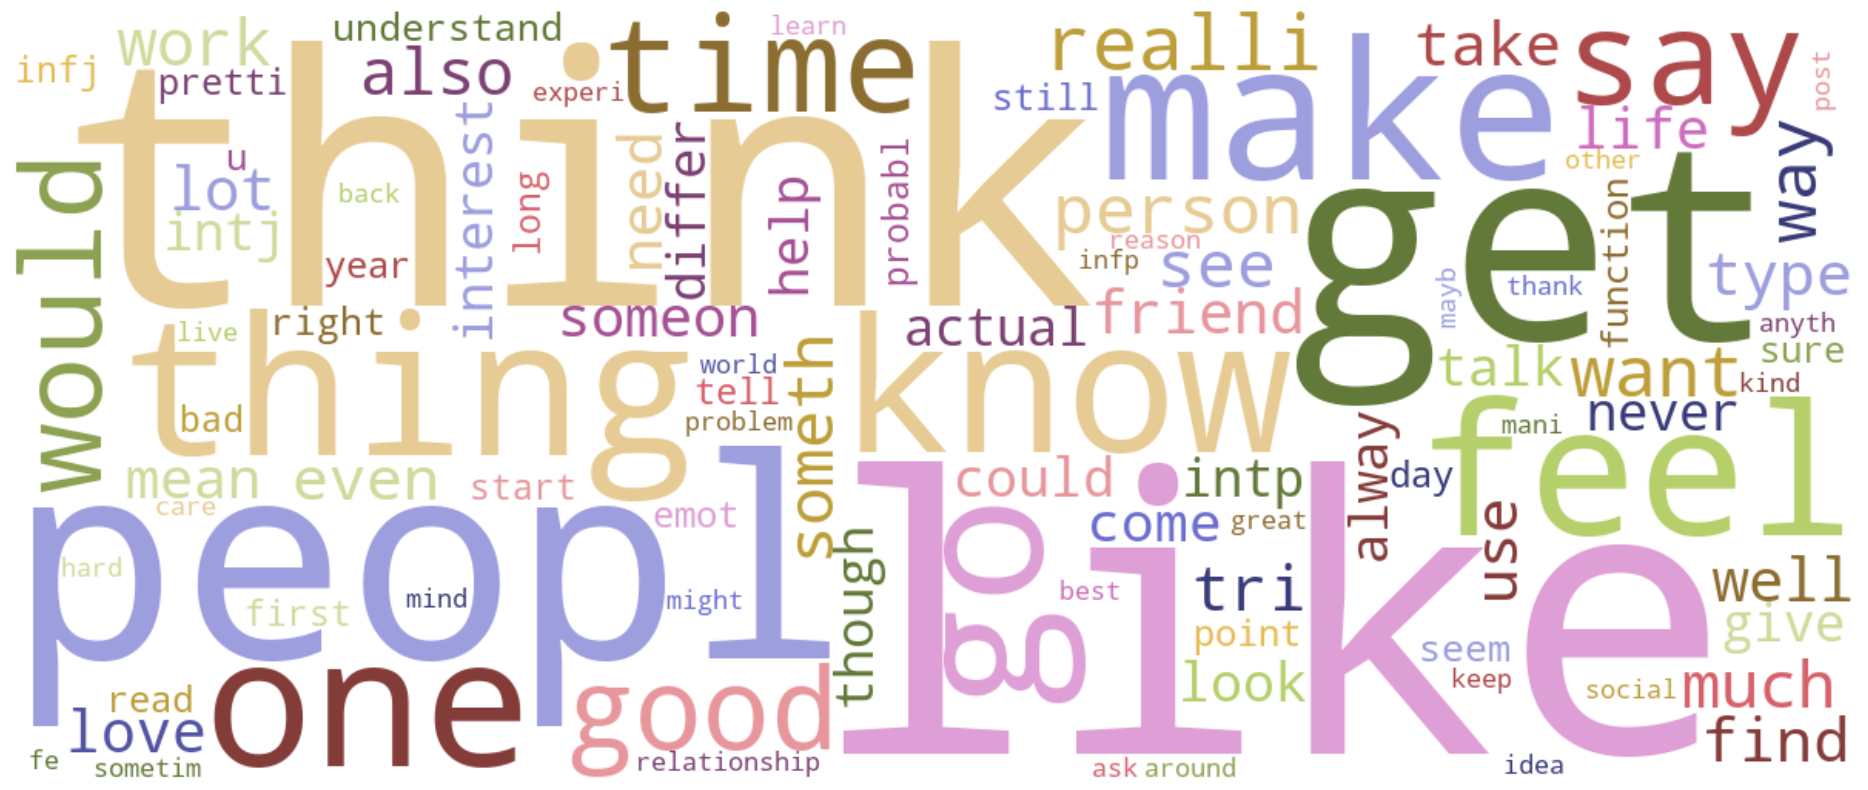

In [28]:
wordcloud = WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate_from_frequencies(dict(top_100_words))
plt.figure(figsize=(25,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Personality Type Word Cloud Generator

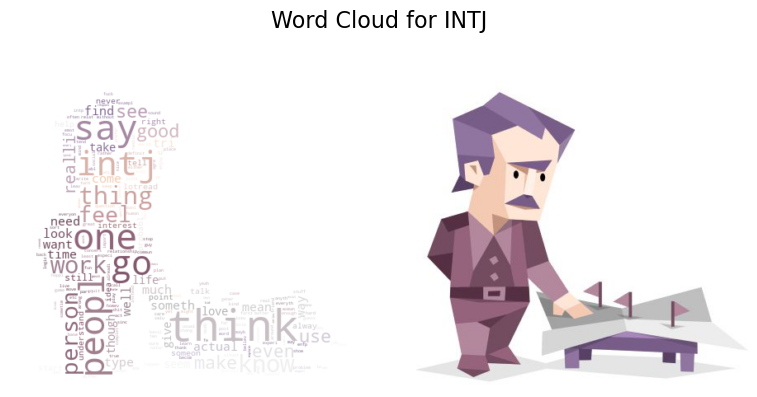

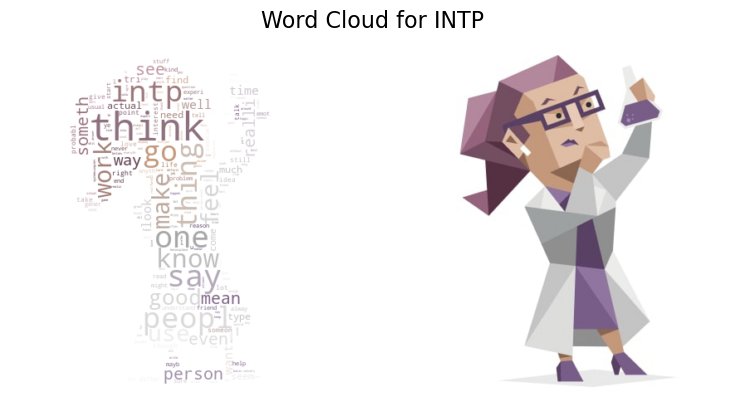

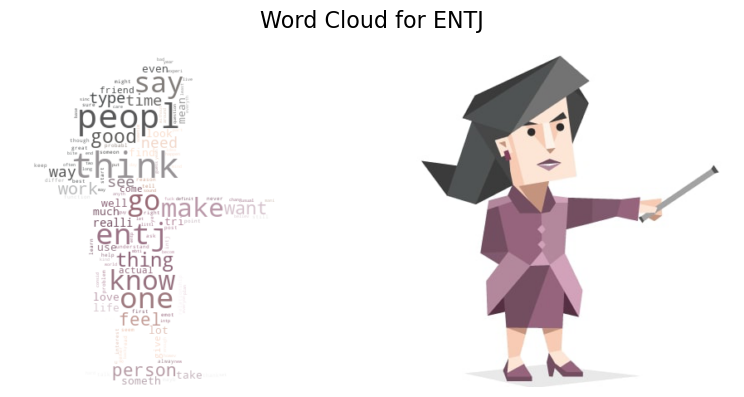

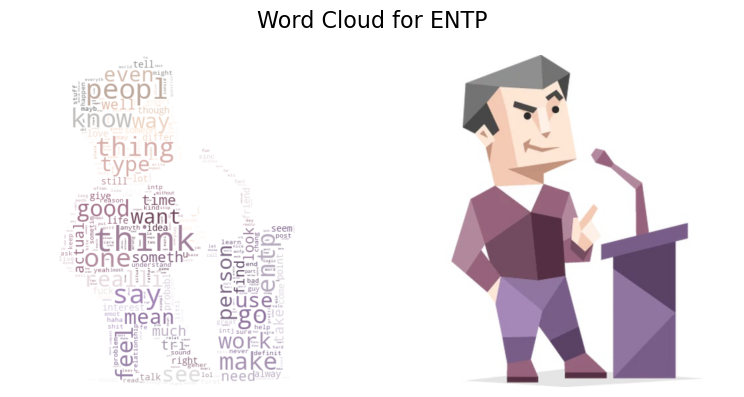

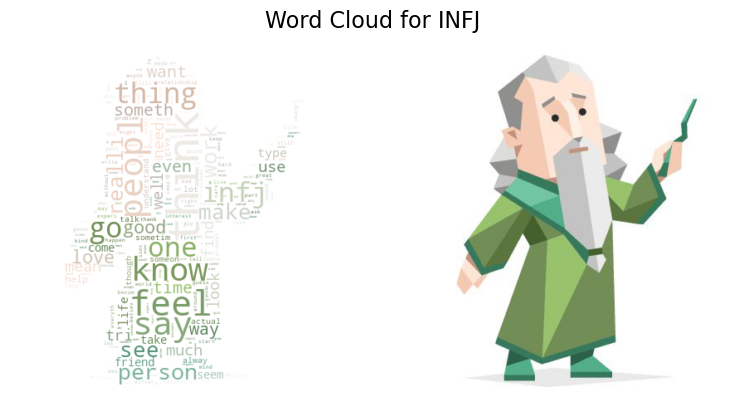

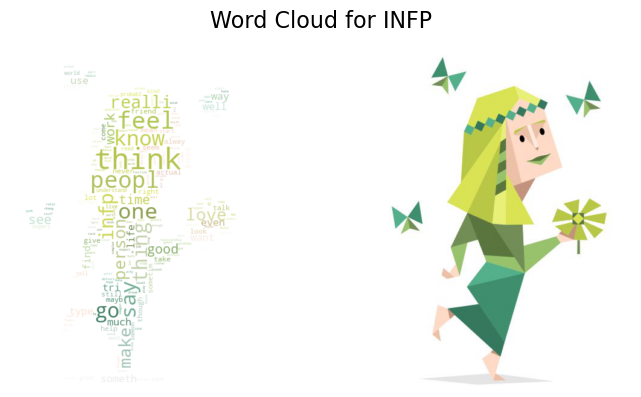

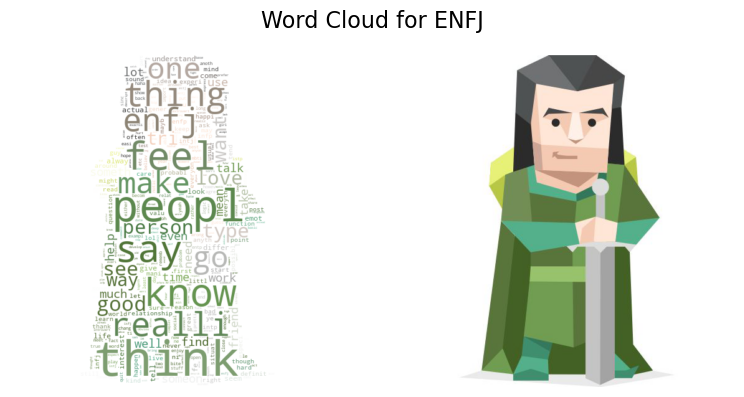

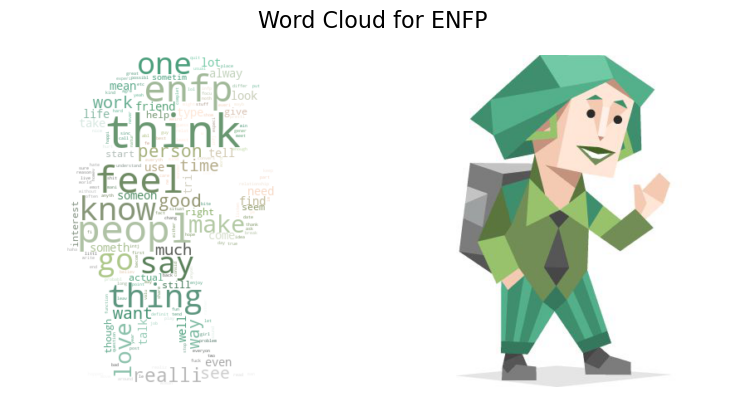

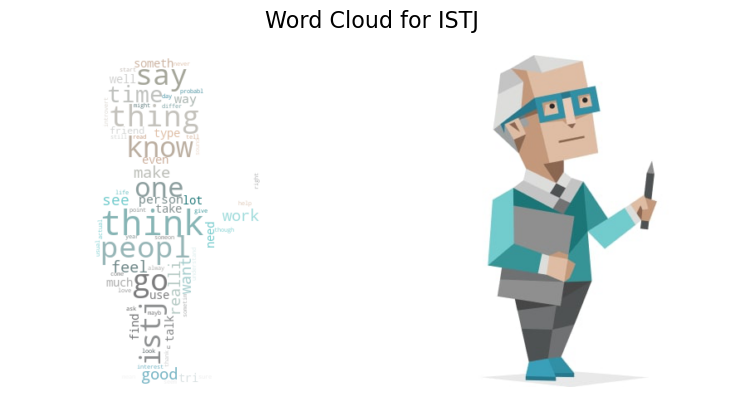

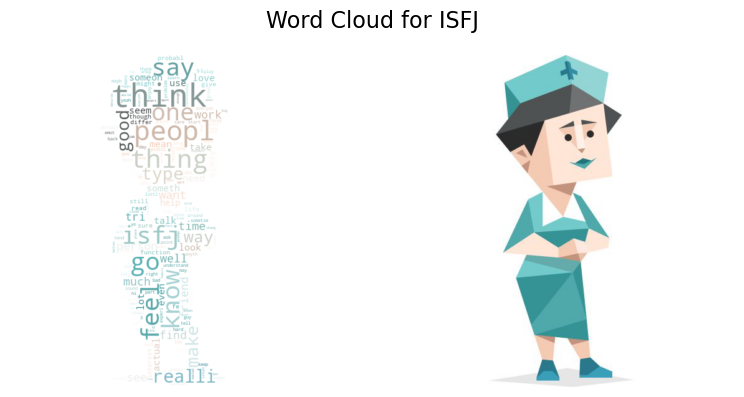

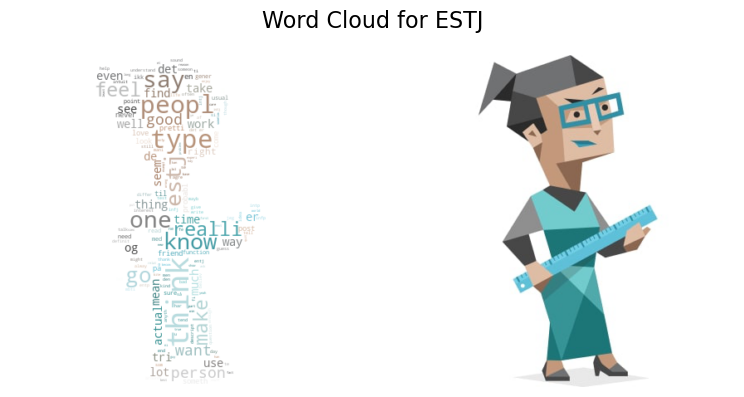

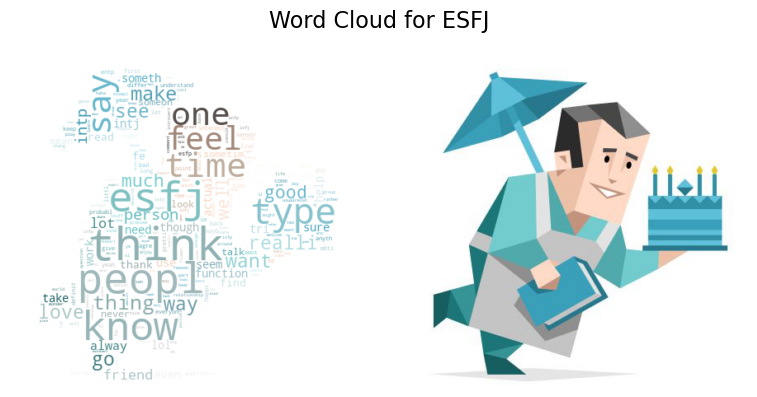

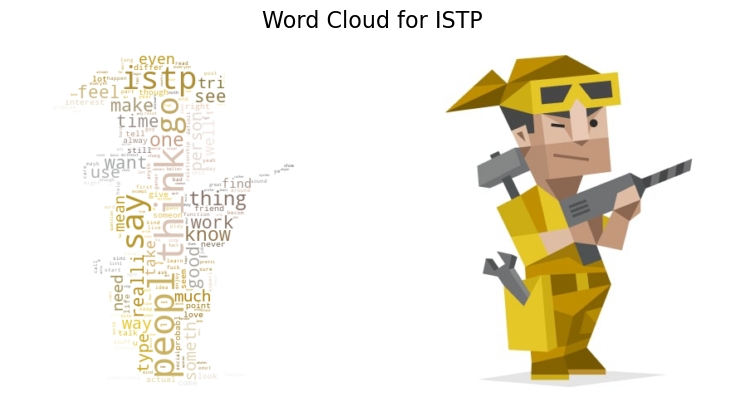

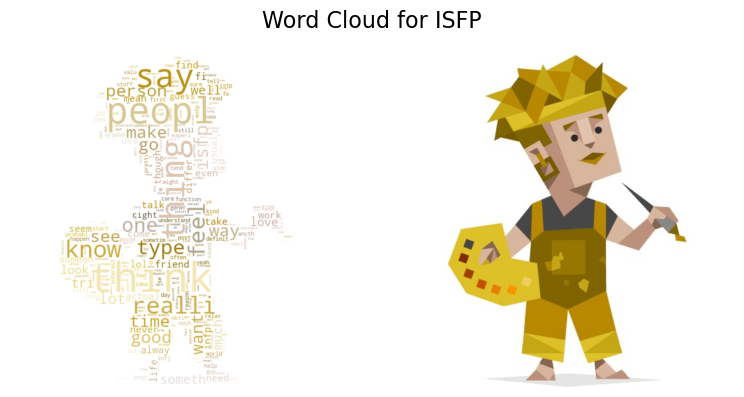

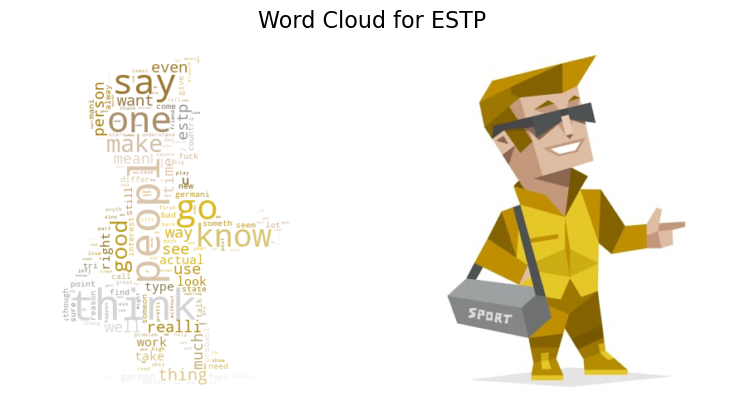

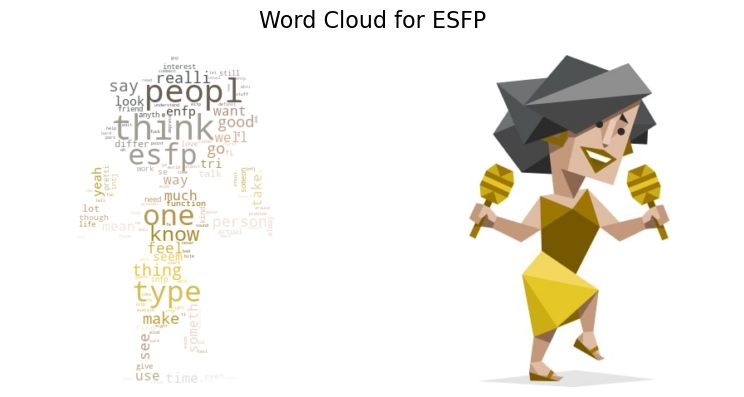

In [29]:
def generate_wordcloud(data, image_path, title):
    text = ' '.join(data['posts'])
    mask = np.array(Image.open(image_path))

    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color="white", max_words=2000, mask=mask, stopwords=stopwords)
    wordcloud.generate(text)

    image_colors = ImageColorGenerator(mask)

    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    plt.axis("off")
    plt.suptitle(f"Word Cloud for {title}", fontsize=16)
    plt.tight_layout()
    plt.show()

personality_types = ['INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP', 'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP']

for personality_type in personality_types:
    data_file = df[df['type'] == personality_type]
    image_path = f'{personality_type.lower()}.jpg'
    generate_wordcloud(data_file, image_path, personality_type)

### Frequency of Parts of Speech in Posts

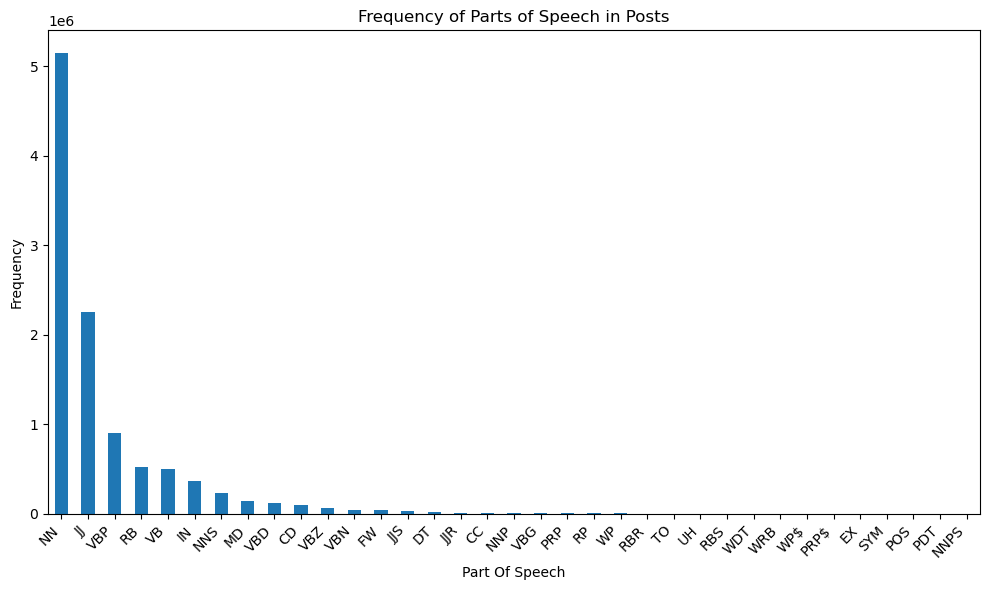

In [30]:
def plot_pos_frequency(df):
    blob = TextBlob(" ".join(df['posts']))
    pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
    pos_counts = pos_df['pos'].value_counts()[:50]

    plt.figure(figsize=(10, 6))
    pos_counts.plot(kind='bar', xlabel="Part Of Speech", ylabel="Frequency", 
                    title="Frequency of Parts of Speech in Posts")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_pos_frequency(df)

### Top Unigram Frequencies in Corpus

In [31]:
def unigram_words(corpus, n):
    vectorizer = CountVectorizer()
    vectorizer.fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    word_counts = bag_of_words.sum(axis=0)
    words_freq = []
    for word, idx in vectorizer.vocabulary_.items():
        word_count = word_counts[0, idx]
        words_freq.append((word, word_count))
    word_freq_sorted = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return word_freq_sorted[:n]

unigram_words_data = unigram_words(df['posts'], 50)
unigram_words_data 

[('like', 147842),
 ('think', 119434),
 ('peopl', 110655),
 ('get', 107005),
 ('thing', 81461),
 ('make', 81387),
 ('know', 75708),
 ('feel', 75364),
 ('one', 73941),
 ('go', 72886),
 ('time', 70329),
 ('say', 70085),
 ('good', 68433),
 ('would', 66716),
 ('realli', 65027),
 ('want', 57547),
 ('person', 53801),
 ('way', 53624),
 ('see', 47827),
 ('also', 46226),
 ('work', 46217),
 ('much', 46143),
 ('someth', 45209),
 ('tri', 43729),
 ('take', 42585),
 ('find', 42010),
 ('type', 41996),
 ('even', 41303),
 ('use', 39639),
 ('well', 38924),
 ('friend', 38123),
 ('lot', 37593),
 ('need', 37472),
 ('love', 34648),
 ('someon', 33725),
 ('life', 33482),
 ('mean', 33211),
 ('come', 32020),
 ('talk', 30935),
 ('could', 30797),
 ('look', 30760),
 ('though', 29758),
 ('actual', 29753),
 ('differ', 28976),
 ('give', 28667),
 ('alway', 28243),
 ('help', 27850),
 ('intp', 27342),
 ('intj', 27340),
 ('never', 27135)]

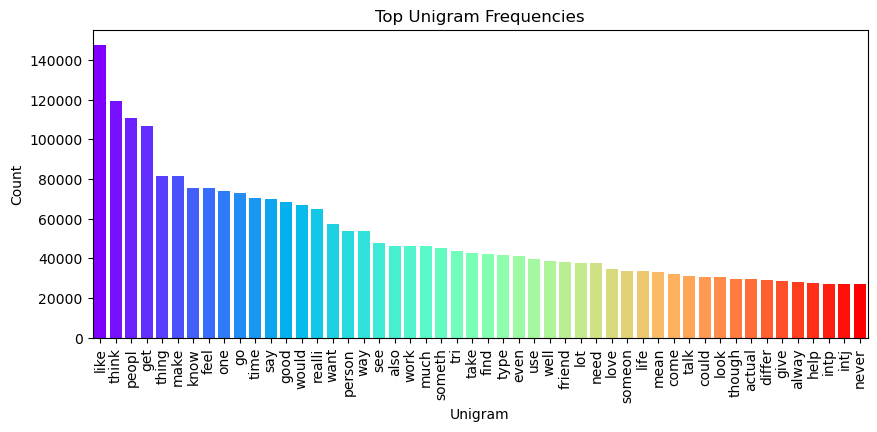

In [32]:
words = [word[0] for word in unigram_words_data]
counts = [word[1] for word in unigram_words_data]
colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))
plt.figure(figsize=(10, 4))
plt.bar(words, counts, color=colors)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Top Unigram Frequencies")
plt.xticks(rotation=90)
plt.xlim(-0.5, len(words) - 0.5)
plt.show()

### Top Bigram Frequencies in Corpus

In [33]:
def bigram_words(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(2,2))
    vectorizer.fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    word_counts = bag_of_words.sum(axis=0)
    words_freq = []
    for word, idx in vectorizer.vocabulary_.items():
        word_count = word_counts[0, idx]
        words_freq.append((word, word_count))
    word_freq_sorted = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return word_freq_sorted[:n]

bigram_words_data  = bigram_words(df['posts'], 50)
bigram_words_data 

[('feel like', 14060),
 ('sound like', 7085),
 ('make sen', 5399),
 ('seem like', 5387),
 ('pretti much', 4446),
 ('make feel', 4390),
 ('even though', 3987),
 ('look like', 3749),
 ('high school', 3602),
 ('thing like', 3492),
 ('someon el', 3362),
 ('best friend', 3343),
 ('peopl like', 3118),
 ('someth like', 2949),
 ('gon na', 2941),
 ('would say', 2872),
 ('lot peopl', 2847),
 ('peopl think', 2838),
 ('would like', 2837),
 ('make sure', 2799),
 ('person type', 2751),
 ('get along', 2749),
 ('realli like', 2745),
 ('one thing', 2676),
 ('cognit function', 2650),
 ('mani peopl', 2626),
 ('year ago', 2618),
 ('get good', 2603),
 ('long time', 2422),
 ('feel good', 2409),
 ('spend time', 2390),
 ('think would', 2374),
 ('peopl know', 2351),
 ('close friend', 2185),
 ('go back', 2170),
 ('everyon el', 2127),
 ('year old', 2113),
 ('realli want', 2088),
 ('like say', 2078),
 ('say someth', 2040),
 ('tri get', 1911),
 ('realli good', 1905),
 ('long term', 1891),
 ('good luck', 1857),
 ('

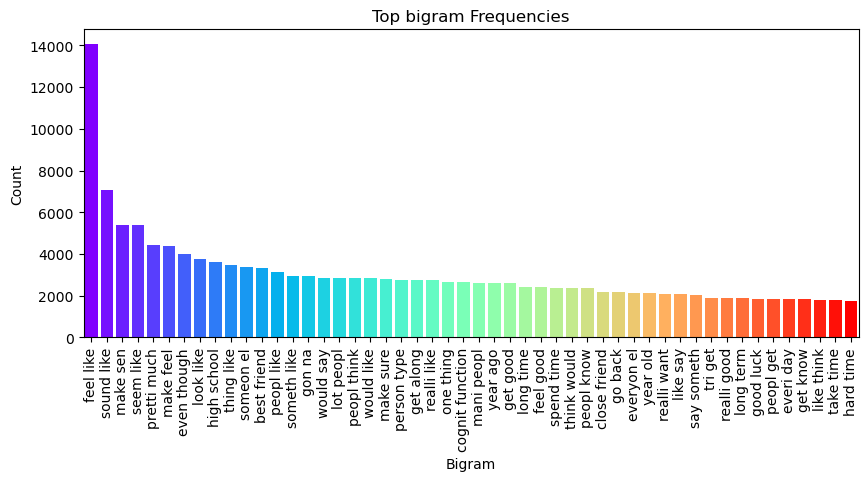

In [34]:
words = [word[0] for word in bigram_words_data]
counts = [word[1] for word in bigram_words_data]
colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))
plt.figure(figsize=(10, 4))
plt.bar(words, counts, color=colors)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Top bigram Frequencies")
plt.xticks(rotation=90)
plt.xlim(-0.5, len(words) - 0.5)
plt.show()

### Top Trigram Frequencies in Corpus

In [35]:
def trigram_words(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(3,3))
    vectorizer.fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    word_counts = bag_of_words.sum(axis=0)
    words_freq = []
    for word, idx in vectorizer.vocabulary_.items():
        word_count = word_counts[0, idx]
        words_freq.append((word, word_count))
    word_freq_sorted = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return word_freq_sorted[:n]

trigram_words_data = trigram_words(df['posts'], 50)
trigram_words_data

[('make feel like', 729),
 ('make feel good', 708),
 ('spend lot time', 593),
 ('entp entp entp', 513),
 ('jackass jackass jackass', 498),
 ('play video game', 492),
 ('get along well', 431),
 ('meet new peopl', 383),
 ('spend much time', 378),
 ('one best friend', 360),
 ('sometim feel like', 356),
 ('say someth like', 331),
 ('take long time', 323),
 ('make lot sen', 306),
 ('long term relationship', 280),
 ('someth along line', 270),
 ('feel like need', 265),
 ('low self esteem', 249),
 ('long time ago', 241),
 ('say thing like', 225),
 ('make feel bad', 224),
 ('long period time', 224),
 ('need alon time', 215),
 ('like everyon el', 213),
 ('tri new thing', 211),
 ('feel like get', 210),
 ('make much sen', 205),
 ('play devil advoc', 199),
 ('ni te fi', 197),
 ('time feel like', 197),
 ('make new friend', 196),
 ('one way anoth', 196),
 ('realli feel like', 195),
 ('make peopl feel', 193),
 ('even though know', 193),
 ('bsp amp bsp', 192),
 ('amp bsp amp', 190),
 ('feel like peopl'

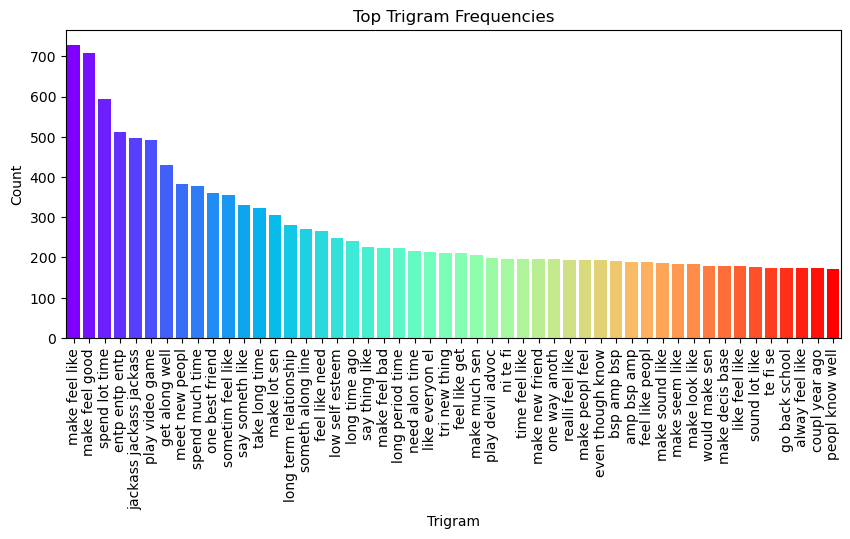

In [36]:
words = [word[0] for word in trigram_words_data]
counts = [word[1] for word in trigram_words_data]
colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))
plt.figure(figsize=(10, 4))
plt.bar(words, counts, color=colors)
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.title("Top Trigram Frequencies")
plt.xticks(rotation=90)
plt.xlim(-0.5, len(words) - 0.5)
plt.show()

# Linear SVC Model

## Data Splitting

In [37]:
X = df['posts'] 
y = df['type']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Vectorizer

In [38]:
vectorizer = TfidfVectorizer()

In [39]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [40]:
X_test_tfidf = vectorizer.transform(X_test)

## Models Training

In [41]:
from sklearn.svm import LinearSVC

In [42]:
svm = LinearSVC()

In [43]:
svm.fit(X_train_tfidf, y_train)

LinearSVC()

In [44]:
svm_y_preds = svm.predict(X_test_tfidf)

In [45]:
accuracy = accuracy_score(y_test, svm_y_preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.77%


### Hyperparameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid = {
    'C': uniform(loc=0, scale=100) 
}

svc = LinearSVC()
random_search = RandomizedSearchCV(svc, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train_tfidf, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'C': 0.5522117123602399}
Best Score:  0.7948804311215898


In [47]:
svc_model = LinearSVC(C=0.5522117123602399)

In [48]:
svc_model.fit(X_train_tfidf, y_train)

LinearSVC(C=0.5522117123602399)

In [49]:
SVM_y_preds = svc_model.predict(X_test_tfidf)

In [50]:
accuracy = accuracy_score(y_test, SVM_y_preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.58%


## Model Evaluation

### Evaluation Metrics

In [51]:
predictions_svc_best = svc_model.predict(X_test_tfidf)

#### Accuracy

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
svc_accuracy = accuracy_score(y_test, predictions_svc_best)
print("Accuracy of the LinearSVC model:", svc_accuracy)

Accuracy of the LinearSVC model: 0.8057520037718058


#### Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix = confusion_matrix(y_test, predictions_svc_best)

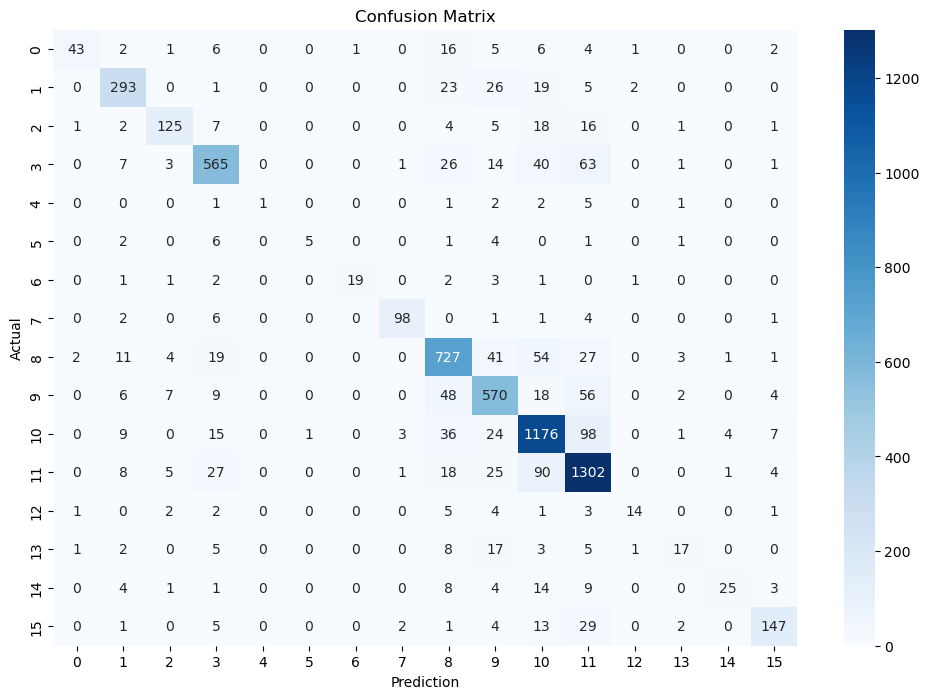

In [56]:
plt.figure(figsize=(12, 8))  # Adjust the figsize to make the plot wider
sns.heatmap(confusion_matrix, 
            annot=True, 
            fmt='g', 
            cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Classification Report

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, predictions_svc_best))

              precision    recall  f1-score   support

        ENFJ       0.90      0.49      0.64        87
        ENFP       0.84      0.79      0.82       369
        ENTJ       0.84      0.69      0.76       180
        ENTP       0.83      0.78      0.81       721
        ESFJ       1.00      0.08      0.14        13
        ESFP       0.83      0.25      0.38        20
        ESTJ       0.95      0.63      0.76        30
        ESTP       0.93      0.87      0.90       113
        INFJ       0.79      0.82      0.80       890
        INFP       0.76      0.79      0.78       720
        INTJ       0.81      0.86      0.83      1374
        INTP       0.80      0.88      0.84      1481
        ISFJ       0.74      0.42      0.54        33
        ISFP       0.59      0.29      0.39        59
        ISTJ       0.81      0.36      0.50        69
        ISTP       0.85      0.72      0.78       204

    accuracy                           0.81      6363
   macro avg       0.83   

#### Cross Validation Score

##### K-fold cross-validation

In [99]:
from sklearn.model_selection import cross_val_score

In [60]:
cv_scores = cross_val_score(svc_model, X_train_tfidf, y_train, cv = 5)

In [61]:
print('Cross validation scores (5 folds): {}'.format(cv_scores))

Cross validation scores (5 folds): [0.79454362 0.80229033 0.7942068  0.78241832 0.80094308]


In [62]:
avg_score = np.mean(cv_scores)
print(f"Average of cross validation scores: {round(avg_score * 100,2)}%")

Average of cross validation scores: 79.49%


# KNN Model

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df['posts'],df['type'],test_size=0.3, random_state=42)

print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(14845,) (14845,) (6363,) (6363,)


In [110]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [111]:
pipeline_knn = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('classifier',KNeighborsClassifier())
])

pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [112]:
y_preds = pipeline_knn.predict(X_test)

In [113]:
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 41.36%


In [114]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = "weighted"))
    print("Recall : ", recall_score(y_test, y_pred, average = "weighted"))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = "weighted"))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred) )
    cm_display.plot()
    plt.show()

In [115]:
confusion_matrix = confusion_matrix(y_test, y_preds)

## KNN Hyperparameter Training

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipeline_knn = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

# Define hyperparameters to search
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 5],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'knn__n_neighbors': [3, 5, 7]
}

# Perform grid search
grid_search = GridSearchCV(pipeline_knn, param_grid, cv=5, n_jobs=-1)

# Fit pipeline with grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Best cross-validation score
print("Best Cross-Validation Score:", grid_search.best_score_)

# Test set accuracy
test_accuracy = grid_search.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


## KNN Model Tuned

In [94]:
pipeline_knn_tuned = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('classifier',KNeighborsClassifier(metric= 'euclidean', n_neighbors= 90, weights= 'distance'))
])

pipeline_knn_tuned.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=90,
                                      weights='distance'))])

In [95]:
y_preds_knn_tuned = pipeline_knn_tuned.predict(X_test)

In [96]:
accuracy = accuracy_score(y_test, y_preds_knn_tuned)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 46.32%


In [97]:
perform(y_preds_knn_tuned)

Precision :  0.7079978059875034
Recall :  0.46322489391796323
Accuracy Score :  0.46322489391796323
F1 Score :  0.48151373396833846

Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.75      0.14      0.24        63
        ENFP       0.75      0.51      0.61       250
        ENTJ       0.93      0.37      0.53       111
        ENTP       0.92      0.17      0.28       488
        ESFJ       1.00      0.17      0.29         6
        ESFP       0.67      0.12      0.20        17
        ESTJ       0.93      0.57      0.70        23
        ESTP       0.95      0.27      0.42        78
        INFJ       0.23      0.95      0.37       575
        INFP       0.67      0.53      0.59       489
        INTJ       0.75      0.40      0.52       913
        INTP       0.76      0.44      0.56       984
        ISFJ       0.56      0.21      0.30        24
        ISFP       0.67      0.26      0.38        38
        ISTJ       1.00      0.0

TypeError: 'numpy.ndarray' object is not callable

# LogisticRegression

In [75]:
X = df['posts']
y = df['type']

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
# Initialize and train the logistic regression model
base_model = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed
base_model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [80]:
# Predict on the testing set
y_pred_base = base_model.predict(X_test_vec)

In [81]:
# Evaluate the base model
accuracy_base = accuracy_score(y_test, y_pred_base)
print("Base Model Accuracy:", accuracy_base)
print("\nClassification Report (Base Model):")
print(classification_report(y_test, y_pred_base))

Base Model Accuracy: 0.7871287128712872

Classification Report (Base Model):
              precision    recall  f1-score   support

        ENFJ       0.92      0.19      0.32        63
        ENFP       0.87      0.72      0.79       250
        ENTJ       0.85      0.62      0.72       111
        ENTP       0.84      0.77      0.80       488
        ESFJ       0.00      0.00      0.00         6
        ESFP       0.00      0.00      0.00        17
        ESTJ       0.91      0.43      0.59        23
        ESTP       0.92      0.73      0.81        78
        INFJ       0.75      0.82      0.78       575
        INFP       0.76      0.80      0.78       489
        INTJ       0.79      0.88      0.83       913
        INTP       0.76      0.89      0.82       984
        ISFJ       0.60      0.12      0.21        24
        ISFP       0.38      0.08      0.13        38
        ISTJ       1.00      0.13      0.23        46
        ISTP       0.92      0.58      0.71       137

   

In [82]:
# For Base Model
accuracy_base = accuracy_score(y_test, y_pred_base)
print("Base Model Accuracy Score:", accuracy_base)

Base Model Accuracy Score: 0.7871287128712872


## Tuned Model

In [83]:
# Define hyperparameters grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Algorithm to use in the optimization problem
}

In [84]:
# Initialize logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

In [85]:
# Initialize grid search with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

In [86]:
# Perform grid search on training data
grid_search.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [87]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'solver': 'lbfgs'}


In [88]:
# Predict using the best model
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test_vec)

In [89]:
# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nTuned Model Accuracy:", accuracy_tuned)
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.8031588873173031

Classification Report (Tuned Model):
              precision    recall  f1-score   support

        ENFJ       0.89      0.40      0.55        63
        ENFP       0.85      0.80      0.82       250
        ENTJ       0.85      0.71      0.77       111
        ENTP       0.82      0.79      0.81       488
        ESFJ       1.00      0.33      0.50         6
        ESFP       1.00      0.12      0.21        17
        ESTJ       0.93      0.57      0.70        23
        ESTP       0.94      0.82      0.88        78
        INFJ       0.76      0.82      0.79       575
        INFP       0.79      0.81      0.80       489
        INTJ       0.81      0.85      0.83       913
        INTP       0.79      0.87      0.83       984
        ISFJ       0.77      0.42      0.54        24
        ISFP       0.57      0.32      0.41        38
        ISTJ       0.83      0.41      0.55        46
        ISTP       0.88      0.70      0.78       137



In [90]:
# For Tuned Model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy Score:", accuracy_tuned)

Tuned Model Accuracy Score: 0.8031588873173031


## Data Visualization

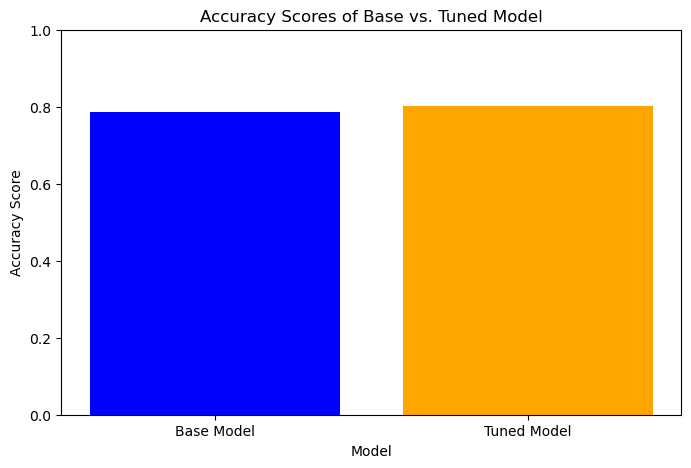

In [91]:
# Accuracy scores for base and tuned models
accuracy_scores = [accuracy_base, accuracy_tuned]
models = ['Base Model', 'Tuned Model']

# Plotting the accuracy scores
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_scores, color=['blue', 'orange'])
plt.title('Accuracy Scores of Base vs. Tuned Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Setting y-axis limit between 0 and 1
plt.show()

# Model Acurracy Comparison

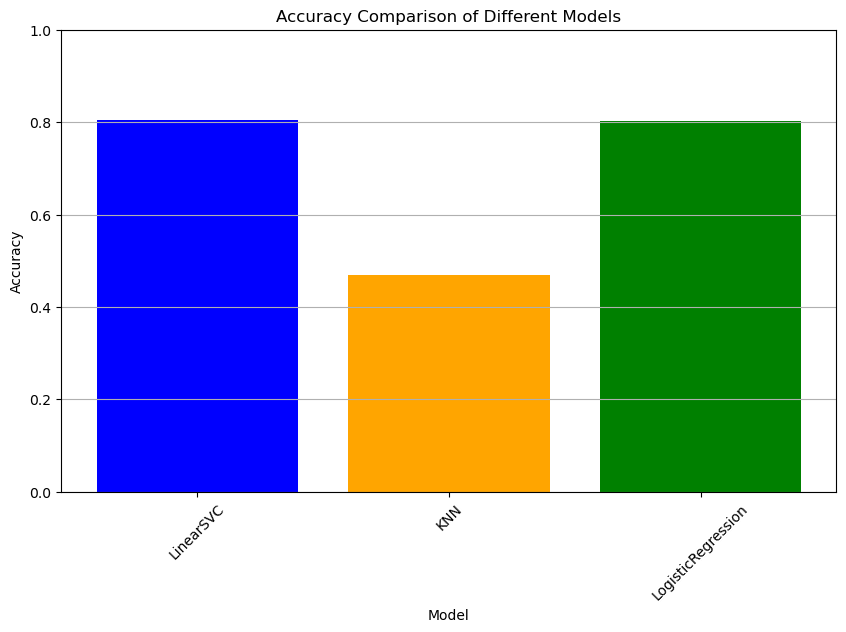

Accuracy Comparison Table:
                Model  Accuracy
0           LinearSVC  0.805752
1                 KNN  0.468804
2  LogisticRegression  0.803159


In [93]:
accuracy_scores = {
    'Model': ['LinearSVC', 'KNN', 'LogisticRegression'],
    'Accuracy': [svc_accuracy, accuracy, accuracy_tuned]
}

accuracy_df = pd.DataFrame(accuracy_scores)

plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['blue', 'orange', 'green'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Accuracy Comparison Table:")
print(accuracy_df)